## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Описание данных

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#импорт библиотеки pandas, считавание данных
import pandas as pd
solvensy = pd.read_csv('/datasets/data.csv')

In [2]:
#первичный осмотр
display(solvensy.tail(40))
print(solvensy.info())

#логическая индексация
display(solvensy.loc[solvensy['income_type'] == 'пенсионер'].head(40))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21485,0,363996.449108,59,высшее,0,женат / замужем,0,F,пенсионер,0,267000.734155,на покупку подержанного автомобиля
21486,0,-1614.022809,36,СРЕДНЕЕ,1,женат / замужем,0,F,сотрудник,1,80763.856017,автомобиль
21487,0,-2376.789344,30,СРЕДНЕЕ,1,гражданский брак,1,F,сотрудник,0,87834.565090,недвижимость
21488,0,-354.755760,35,высшее,0,Не женат / не замужем,4,F,компаньон,0,128897.486083,недвижимость
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21490,2,-1867.006757,32,среднее,1,женат / замужем,0,F,сотрудник,0,34767.965495,операции с коммерческой недвижимостью
21491,20,-173.954460,27,среднее,1,женат / замужем,0,F,сотрудник,0,155520.899688,на покупку подержанного автомобиля
21492,0,-1618.645283,54,среднее,1,женат / замужем,0,M,компаньон,0,295234.214807,покупка жилой недвижимости
21493,1,-1214.858885,38,среднее,1,женат / замужем,0,F,сотрудник,0,147502.599329,покупка жилья для семьи
21494,0,-960.095747,39,среднее,1,гражданский брак,1,M,компаньон,1,176369.594491,дополнительное образование


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью
35,0,394021.072184,68,среднее,1,гражданский брак,1,M,пенсионер,0,77805.677436,на проведение свадьбы
50,0,353731.432338,63,среднее,1,женат / замужем,0,F,пенсионер,0,92342.730612,автомобили
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


### Вывод

**Первичный осмотр:**

При первом осмотре таблицы:
- столбец "days_employed" имеет отрицательные значения
- столбец "education" имеет разные регистры одинаковых значений

Тип строки "gender" можно перевести в тип "int64" и назначить цифры 0 и 1, но на данном этапе это не критично.

**Пенсионеры:**

Если посмотреть на положительные значения стажа работы, то мы увидим, что положительное значение только одно из 10, и оно отличается от других строк тем, что данный человек - пенсионер. Для подтверждения догадки применяем логическую индексацию к таблице.

**Логическая индексация:**

Согласно первым 20 строкам - у всех пенсионеров положительное значение стажа работы, в отличие от людей, которые еще работают. Если сравнить эти значения, то можно заметить следующее:
- Отрицательный стаж работы состоит из цифр от трехзначных до четырехзначных.
- Стаж работы пенсионеров состоит из шестизначных цифр.

Можно предположить, что первые две цифры стажа у положительных значений - стаж в годах. А остальные цифры числа – количество дней со дня выхода на пенсию. Посчитаем (строка №101):

Стаж работы в днях = 391558.961849
Возраст = 65

Удалим дробную часть для упрощения вычислений:

Стаж работы в днях = 391558

Вынесем первые две цифры стажа работы в отдельное значение:

Стаж работы в годах = 39

Вынесем последние четыре цифры стажа работы в днях в отдельное значение:

Дней после пенсии = 1558

На основании этих значений вычислим возраст начала трудового стажа:

(возраст - (дни после пенсии / 360)) - трудовой стаж в годах =
(65 - (1558 / 360.2)) - 39 = 65 - 4.3 - 39 = 21.7

Вычислим еще несколько таких значений:

№4: (53 - (266 / 360.2)) - 34 = 53 - 0.7 - 34 = 18.3
№25: (67 - (3548 / 360.2)) - 36 = 67 - 9.8 - 36 = 21.2

На данный момент выглядит правдоподобно. Если пойти от обратного и вычислять только возраст выхода на пенсию - мы увидим, что и возраст выхода выглядит правдоподобно, т. к. почти все эти люди со среднем образованием, что указывает на возможные: тяжелые условия труда/подземные работы/вредные условия труда/труд в горячих цехах/текстильную и прочую промышленность. 
Для данных категорий пенсионный возраст значительно снижен.
Поэтому на данный момент оставляем нашу гипотезу такой, какая она есть.

**Новые вопросы:**

При осмотре таблицы после логической индексации видим:

- Пропущенные значения в столбце "days_employed"
- Пропущенные значения в столбце "total_income"

Возможные причины появления пропусков случайно-связанные. Причину отсутствия значений в столбце "days_employed" отследить трудно, ведь возможны: ошибки ввода/вывода, "быстрые кредиты" и т.д. При этом, скорее всего, столбцы "days_employed" и "total_income" связанны, т.к. средний заработок может рассчитываться, учитывая длительность трудового стажа.
Пропуски в столбце "dob_years" скорее всего полностью случайны.

### Шаг 2. Предобработка данных

### Обработка пропусков

In [4]:
#исправляем ошибочные данные в колонке "children"
solvensy.loc[solvensy['children'] == 20, 'children'] = 2
solvensy.loc[solvensy['children'] == -1, 'children'] = 1

#приводим столбец 'education' к единообразию
solvensy['education'] = solvensy['education'].str.lower()

#заполняем пропущенные значения таблицы в столбцах "days_employed" и "total_income"
educ = solvensy['education'].unique()

for i in educ:
    education = (
        solvensy
        .loc[solvensy['education'] == i]
        .median(axis = 0)['total_income']
)
    solvensy.loc[solvensy['education'] == i] = (
        solvensy
        .fillna(value = {'total_income' : education})
)

dob_y = solvensy['dob_years'].unique()

for i in dob_y:
    dob = (
        solvensy
        .loc[solvensy['dob_years'] == i]
        .median(axis = 0)['days_employed']
)
    solvensy.loc[solvensy['dob_years'] == i] = (
        solvensy
        .fillna(value = {'days_employed' : dob})
) 

#преобразуем стаж в отдельную колонку для удобочитаемого формата
years_employed = []

for index, row in solvensy.iterrows():
    if row['days_employed'] < 0 or row['days_employed'] > 0: 
        if row['days_employed'] < 0:
            years_employed.append(abs(round(row['days_employed']/360.25)))
        if row['days_employed'] > 0:
            years_employed.append(round(row['days_employed']/10000))
    else:
        years_employed.append(row['days_employed'])

solvensy['years_employed'] = years_employed

display(solvensy.head(40))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,16
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,34
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,3
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,8
7,0,-152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,0
8,2,-6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,19
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,6


### Вывод

Исправлена колонка 'children', заменены ошибочные значения (-1, 20). Скорее всего это ошибка ввода.
Колонка 'education' приведена к единообразию для извлечения уникальных значений. Разный регистр
одинаковых значений скорее всего вызван невозможностью выбрать фиксированные значения из списка при вводе данных
клиента.

Заполнены пропуски в колонках: 
- "days_employed" (на основании группы в той же возрастной категории)
- "total_income" (на основании группы с тем же образованием)

Стаж в днях преобразован в отдельную колонку стажа в годах на основании вышеописанной теории
о возникновении положительных и отрицательных значений.

### Замена типа данных

In [11]:
#преобразование колонки 'gender' в колонку с 'gender_id'
gender_id = []

for index, row in solvensy.iterrows():
    if row['gender'] == 'M':
        gender_id.append(1)
    else:
        gender_id.append(0)
        
solvensy['gender_id'] = gender_id

#преобразование колонки 'total_income' и 'days_employed' из типа float64 в тип int64
solvensy['total_income'] = solvensy['total_income'].astype(int)
solvensy['days_employed'] = solvensy['days_employed'].astype(int)

print(solvensy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 14 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
years_employed      21525 non-null int64
gender_id           21525 non-null int64
dtypes: int64(9), object(5)
memory usage: 2.3+ MB
None


### Вывод

Колонке 'gender' присвоены целочисленные значения (M - 1, F - 0), в целях оптимизации таблицы.
Колонки 'total_income' и 'days_employed' преобразованы из типа float64 в тип int64 c удалением дробной части.


### Обработка дубликатов

In [14]:
#подсчет количества дубликатов в таблице
solvensy.duplicated().sum()

#удаление дубликатов с удалением строк и восстановлением индексации
solvensy.drop_duplicates(subset=None, keep='first', inplace=True)

#подсчет количества дубликатов в таблице после удаления
solvensy.duplicated().sum()

0

### Вывод

Проведен поиск дубликатов. Т.к. ранее мы привели столбцы к единообразию (все слова сделали строчными), то проведен поиск дубликатов и с учетом регистра. Удалены все дубликаты с удалением строк и восстановлением индексации.

### Лемматизация

In [18]:
from pymystem3 import Mystem
from collections import Counter
m = Mystem()

#находим основные леммы
lems = []
all_lems = []

for index, row in solvensy.iterrows():
    text = row['purpose']
    lemmas = m.lemmatize(text)
    all_lems = all_lems + lemmas
    
print(Counter(all_lems))

Counter({' ': 33570, '\n': 21454, 'недвижимость': 6351, 'покупка': 5897, 'жилье': 4460, 'автомобиль': 4306, 'образование': 4013, 'с': 2918, 'операция': 2604, 'свадьба': 2324, 'свой': 2230, 'на': 2222, 'строительство': 1878, 'высокий': 1374, 'получение': 1314, 'коммерческий': 1311, 'для': 1289, 'жилой': 1230, 'сделка': 941, 'дополнительный': 906, 'заниматься': 904, 'проведение': 768, 'сыграть': 765, 'сдача': 651, 'семья': 638, 'собственный': 635, 'со': 627, 'ремонт': 607, 'подержанный': 486, 'подержать': 478, 'приобретение': 461, 'профильный': 436})


#### Основные леммы, которые отражают цель получения кредита:
- недвижимость
- жилье
- автомобиль
- образование
- свадьба

"Ремонт" встречается не так часто, идет в купе с "жильем" и "недвижимостью", так что это можно отнести к операциям с недвижимость.

In [40]:
#создание функции для сортировки целей кридита
def target(text):
    if 'недвижимость' in text:
        return 'недвижимость'
    if 'жилье' in text:
        return 'недвижимость'
    if 'автомобиль' in text:
        return 'автомобиль'
    if 'образование' in text:
        return 'образование'
    if 'свадьба' in text:
        return 'свадьба'
    
#создание отдельного столбца отражающего целью кредита    
lems = []
target_prop = []
for index, row in solvensy.iterrows():
    text = row['purpose']
    lemmas = m.lemmatize(text)
    target_prop.append(target(lemmas))

solvensy['target_purpose'] = target_prop 

print(solvensy['target_purpose'].value_counts())

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2324
Name: target_purpose, dtype: int64

### Вывод

Произведена лемматизация столбца 'target_purpose' с помощью библиотеки pymystem3. Ключевые слова выделены в отдельную колонку для последующей категоризации. Самая частая цель кредита - приобретение недвижимости (10811), после нее следует покупка автомобиля (4306), затем получение образования (4013), затем - свадьба (2324).

### Категоризация данных

In [39]:
#категоризируем по наличию детей
children_data = solvensy[['children', 'debt']]
#display(children_data.groupby('children').mean().sort_values('debt',ascending=False))

#категоризируем по семейному статусу
family_data = solvensy[['family_status', 'debt']]
#display(family_data.groupby('family_status').mean().sort_values('debt',ascending=False))

#категоризируем по доходу
solvensy['income_category'] = pd.qcut(
    solvensy['total_income'],
    q=5,
    labels=["очень низкий", "низкий", "средний", "высокий", "очень высокий"]
)

income_data = solvensy[['income_category', 'debt']]
display(income_data.groupby('income_category').mean().sort_values('debt',ascending=False))

#категоризируем по целям кредита
purpose_data = solvensy[['target_purpose', 'debt']]
#display(purpose_data.groupby('target_purpose').mean().sort_values('debt',ascending=False))

,debt
income_category,
средний,0.089510
низкий,0.083197
высокий,0.082964
очень низкий,0.080168
очень высокий,0.069914


### Вывод

Провели категоризацию данных согласно целевым вопросам исследования. Разбили уровень дохода на пять категорий - "очень низкий", "низкий", "средний", "высокий", "очень высокий" с помощью метода .qcut().

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64


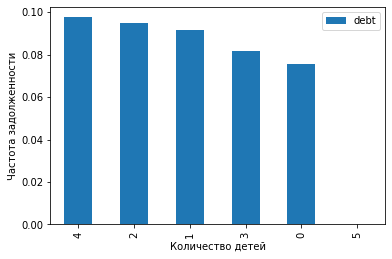

In [51]:
ax = children_data.groupby('children').mean().sort_values('debt',ascending=False).plot(kind='bar')
ax.set_xlabel("Количество детей")
ax.set_ylabel("Частота задолженности")

print(solvensy['children'].value_counts())

### Вывод

Согласно графику, существует зависимость между наличием детей и частотой задолженности по кредиту. Отсутствие или наличие трех детей - одинаково по количеству задолженности, при этом наличие 1, 2 или 4 детей явно увеличивает частоту задолженности.

Но, согласно таблице, количество человек с 5-ю детьми - 9, с 4-мя - 41, с 3 - 330. На данный момент возможно сравнить только людей без детей (лучше сделать случайную выборку) с людьми, у которых есть 1 и 2 ребенка (их можно объединить в одну группу). Тогда мы можем сказать, что скорее всего люди, у которых есть дети чаще имеют задолженность по кредиту, чем люди, у которых нет детей.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64


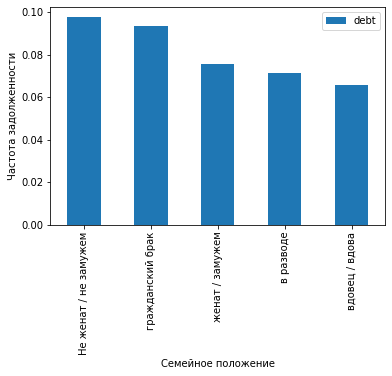

In [50]:
ax = family_data.groupby('family_status').mean().sort_values('debt',ascending=False).plot(kind='bar', legend = True)
ax.set_xlabel("Семейное положение")
ax.set_ylabel("Частота задолженности")

print(solvensy['family_status'].value_counts())

### Вывод

Наиболее нестабильная категория населения — это не женатые/не замужние, их частота задолженности по кредиту превышает все другие категории. Скорее всего это связано с образом жизни.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Text(0, 0.5, 'Частота задолженности')

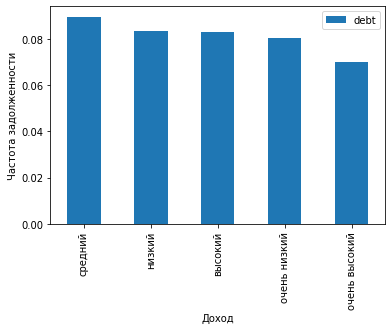

In [54]:
ax = income_data.groupby('income_category').mean().sort_values('debt',ascending=False).plot(kind='bar')
ax.set_xlabel("Доход")
ax.set_ylabel("Частота задолженности")

### Вывод

Согласно графику, люди со средним доходом наиболее часто имеют задолженность по кредиту. Затем следуют люди с низким доходом. Скорее всего это связано с карьерным путем. Люди с низким доходом не всегда могут рассчитать силы, а люди, которые перешли в группу среднего дохода не всегда успевают правильно расставить приоритеты при новых финансовых возможностях.

- Как разные цели кредита влияют на его возврат в срок?

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2324
Name: target_purpose, dtype: int64


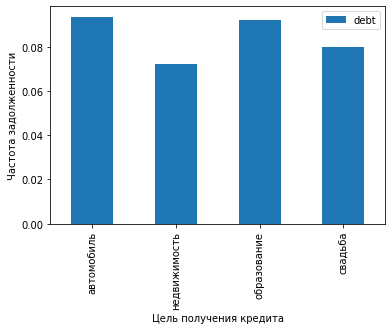

In [62]:
ax = pd.pivot_table(solvensy, values='debt', index=['target_purpose']).plot(kind='bar')
ax.set_xlabel("Цель получения кредита")
ax.set_ylabel("Частота задолженности")

print(solvensy['target_purpose'].value_counts())

### Вывод

Именно с покупкой автомобиля связана наибольшая частота задолженностей. Возможно это связано с тем, что автомобиль может подвергнуться авариям и критическим поломкам.

### Шаг 4. Общий вывод

#### При осмотре таблицы выявлены следующие недостатки:

- Отсутствие некоторых значений в столбцах ("days_employed", "total_income")
- Наличие отрицательных и положительных значений в столбце стажа работы ("days_employed")
- Наличие разнорегистровых значений в столбце "education" при одинаковых значениях
- Наличие ошибочно введённых данных в столбце "children"
- Наличие дубликатов

#### Проведенная работа:
1. Заполнены пропуски в столбцах "days_employed" и "total_income" на основании медианных значений групп
   того же возраста и такого же образования соответственно
2. Выдвинута теория о возникновении отрицательных и положительных значений в столбце "days_employed",
   согласно которой отрицательные значения - стаж людей, вышедших на пенсию, положительные значения -
   стаж людей, которые еще работают. Согласно этой теории, стаж в днях конвертирован в стаж в годах и вынесен
   в отдельный столбец. Предыдущие значения сохранены для возможности вернуться к ним при изменении теории.
3. Столбце "education" приведен к единообразию.
4. Ошибки в стобце "children" связаны с ошибками ввода оператора. Написана функция для устранения.
5. После нормализации таблицы были выявлены и удалены дубликаты (71). 
6. Столбцы "days_employed" и "total_income" относились к типу float. Т.к. в этих столбцах не нужна повышенная точность, столбцы были приведены к типу integer с отбросом дробной части.
7. Колонка "gender" приведена к целочисленному типу и оформлена в отдельную "gender_id".
8. Произведена лемматизация столбца "purpose" с помощью библиотеки pymystem3, с целью выделения в отдельную колонку целей кредита, для последующей категоризации.
9. Произведена категоризация таблицы согласно основным вопросам исследования (количество детей, семейное положение, цели кредита, доход клиентов). Доход клиентов разбит на 5 равных групп ("очень низкий", "низкий", "средний", "высокий", "очень высокий") с помощью метода ".qcut".

#### По результатам исследования обнаружено следующее:
1. Люди, у которых есть дети, чаще имеют задолженность по кредиту, чем люди, у которых детей нет.
2. Наиболее нестабильная категория населения — это не женатые/не замужние, их частота задолженности по кредиту превышает все другие категории.
3. Люди со средним и низким доходом наиболее часто имеют задолженность по кредиту.
4. Наибольшая частота задолженностей по кредиту связана с кредитом на покупку автомобиля.

#### Согласно группировкам данных следует:
1. Дополнить исследование большим количеством категорий, чтобы предположить основные причины задолженности. К примеру, возможно сравнить возраст берущего кредит на получение образования и частоту задолженности. Предположительно люди младшей возрастной категории могут чаще не возвращать такой кредит из-за особенностей менталитета, или попросту потому, что не рассчитали силы. 
2. Там, где существуют не равные категории (дети, семейное положение) проводить исследование на основании выборок, или же дополнить данные большим количеством людей этой категории.


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.